# বেসিক সার্কিট আইডেন্টিটিস

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

যখন আমরা কোয়ান্টাম কম্পিউটার প্রোগ্রাম করি, তখন আমাদের লক্ষ্য সর্বদা মৌলিক বিল্ডিং ব্লক থেকে দরকারী কোয়ান্টাম সার্কিট তৈরি করা। কিন্তু কখনও কখনও, আমাদের কাছে আমাদের কাঙ্খিত সমস্ত মৌলিক বিল্ডিং ব্লক নাও থাকতে পারে। এই বিভাগে, আমরা দেখব কীভাবে আমরা মৌলিক গেটগুলিকে একে অপরের মধ্যে রূপান্তর করতে পারি এবং কীভাবে সেগুলিকে ব্যবহার করে এমন কিছু গেট তৈরি করতে পারি যা কিছুটা জটিল (তবে এখনও বেশ মৌলিক)।

এই অধ্যায়ে আলোচিত অনেক কৌশলই প্রথম 1995 সালে বারেনকো এবং সহ-লেখকদের দ্বারা একটি গবেষণাপত্রে প্রস্তাবিত হয়েছিল [1]।

## বিষয়বস্তু

1. [Making a Controlled-Z from a CNOT](#c-from-cnot)
2. [Swapping Qubits](#swapping)
3. [Controlled Rotations](#controlled-rotations)
4. [The Toffoli](#ccx)
5. [Arbitrary rotations from H and T](#arbitrary-rotations)
6. [References](#references)

## 1. একটি CNOT থেকে একটি নিয়ন্ত্রিত-Z তৈরি করা<a id="c-from-cnot"></a>

নিয়ন্ত্রিত-Z বা `cz` গেট হল আরেকটি ভাল-ব্যবহৃত দুই-qubit গেট। ঠিক যেমন CNOT তার টার্গেট কিউবিটে একটি $X$ প্রয়োগ করে যখনই এটির নিয়ন্ত্রণ $|1\rangle$ স্টেটে থাকে, একই ক্ষেত্রে নিয়ন্ত্রিত-$Z$ একটি $Z$ প্রয়োগ করে। কিস্কিট-এ এটি সরাসরি এর সাথে আহ্বান করা যেতে পারে

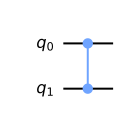

In [2]:
# a controlled-Z
qc.cz(c,t)
qc.draw()

যেখানে c এবং t হল কন্ট্রোল এবং টার্গেট qubits। IBM Q ডিভাইসে, তবে, একমাত্র দুই-কুবিট গেট যা সরাসরি প্রয়োগ করা যেতে পারে তা হল CNOT। তাই আমরা একটি উপায় অন্য একটি রূপান্তর প্রয়োজন.

এই জন্য প্রক্রিয়া বেশ সহজ. আমরা জানি যে Hadamard স্টেটগুলিকে $|0\rangle$ এবং $|1\rangle$কে যথাক্রমে $|+\rangle$ এবং $|-\rangle$ এ রূপান্তরিত করে। আমরা আরও জানি যে $|+\rangle$ এবং $|-\rangle$ রাজ্যগুলিতে $Z$ গেটের প্রভাব $|0\rangle$ এবং $|1 স্টেটগুলিতে $X$ এর মতোই। যথাক্রমে \rangle$। এই যুক্তি থেকে, বা কেবলমাত্র সংখ্যাবৃদ্ধি থেকে, আমরা এটি খুঁজে পাই

$$ H X H = Z,\\ H Z H = X. $$

একই কৌশলটি একটি CNOT কে নিয়ন্ত্রিত-$Z$-এ রূপান্তর করতে ব্যবহার করা যেতে পারে। আমাদের যা করতে হবে তা হল লক্ষ্য কিউবিটে একটি Hadamard দিয়ে CNOT-এর আগে এবং অনুসরণ করা। এটি সেই কিউবিটে প্রয়োগ করা যেকোনো $X$কে $Z$ এ রূপান্তরিত করবে।

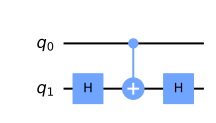

In [3]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

আরো সাধারণভাবে, আমরা একটি একক CNOT কে ব্লোচ গোলকের চারপাশে যেকোন ঘূর্ণনের একটি নিয়ন্ত্রিত সংস্করণে রূপান্তর করতে পারি $\pi$, সঠিক ঘূর্ণনগুলির সাথে এটির পূর্ববর্তী এবং অনুসরণ করে। উদাহরণস্বরূপ, একটি নিয়ন্ত্রিত-$Y$:

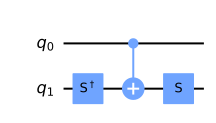

In [4]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()

এবং একটি নিয়ন্ত্রিত-$H$:

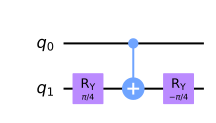

In [5]:
qc = QuantumCircuit(2)
# a controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()

## 2. Swapping Qubits <a id="swapping"></a>

In [6]:
a = 0
b = 1

কখনও কখনও আমাদের একটি কোয়ান্টাম কম্পিউটারে তথ্য স্থানান্তর করতে হয়। কিছু qubit বাস্তবায়নের জন্য, এটি তাদের শারীরিকভাবে সরানোর মাধ্যমে করা যেতে পারে। আরেকটি বিকল্প হল দুটি কিউবিটের মধ্যে স্টেট সরানো। এটি SWAP গেট দ্বারা করা হয়।

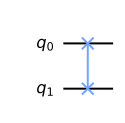

In [7]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

উপরের কমান্ডটি সরাসরি এই গেটকে আহ্বান করে, কিন্তু আসুন দেখি কিভাবে আমরা আমাদের স্ট্যান্ডার্ড গেট সেট ব্যবহার করে এটি তৈরি করতে পারি। এর জন্য, আমাদের কয়েকটি উদাহরণ বিবেচনা করতে হবে।

প্রথমে, আমরা কেসটি দেখব যে qubit a $|1\rangle$ অবস্থায় আছে এবং qubit b $|0\rangle$ স্টেটে আছে। এর জন্য আমরা নিম্নলিখিত গেটগুলি প্রয়োগ করব:

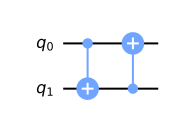

In [8]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()

qubit b-কে $|1\rangle$ এবং qubit a-কে $|0\rangle$-এ রাখার প্রভাব রয়েছে। এই ক্ষেত্রে অন্তত, আমরা একটি SWAP করেছি।

এখন এই অবস্থা নিয়ে যাওয়া যাক এবং SWAP কে আসল অবস্থায় ফিরিয়ে নেওয়া যাক। আপনি যেমন অনুমান করেছেন, আমরা উপরের প্রক্রিয়াটির বিপরীতে এটি করতে পারি:

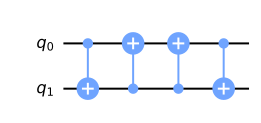

In [9]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()

মনে রাখবেন যে এই দুটি প্রক্রিয়ায়, একটির প্রথম গেট অন্যটির প্রাথমিক অবস্থার উপর কোন প্রভাব ফেলবে না। উদাহরণস্বরূপ, যখন আমরা $|1\rangle$ b কে a এ অদলবদল করি, প্রথম গেটটি হল `cx(b,a)` । যদি এটির পরিবর্তে এমন একটি স্টেট প্রয়োগ করা হয় যেখানে কোন $|1\rangle$ প্রাথমিকভাবে b তে ছিল না, এটির কোন প্রভাব থাকবে না।

আরও মনে রাখবেন যে এই দুটি প্রক্রিয়ার জন্য, একটির চূড়ান্ত গেট অন্যটির চূড়ান্ত অবস্থার উপর কোন প্রভাব ফেলবে না। উদাহরণ স্বরূপ, চূড়ান্ত `cx(b,a)` যা প্রয়োজন হয় যখন আমরা $|1\rangle$ কে a থেকে b তে অদলবদল করি যেখানে $|1\rangle$ b এর উপর নেই সেখানে কোন প্রভাব নেই।

এই পর্যবেক্ষণগুলির সাথে, আমরা একটি থেকে অন্যটিতে একটি অকার্যকর গেট যোগ করে দুটি প্রক্রিয়াকে একত্রিত করতে পারি। উদাহরণ স্বরূপ,

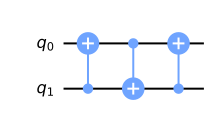

In [10]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

আমরা এটিকে একটি প্রক্রিয়া হিসাবে ভাবতে পারি যা একটি $|1\rangle$ কে a থেকে b তে অদলবদল করে, কিন্তু শুরুতে একটি অকেজো `qc.cx(b,a)` দিয়ে। আমরা এটিকে একটি প্রক্রিয়া হিসাবেও ভাবতে পারি যা $|1\rangle$ কে b থেকে a তে অদলবদল করে, কিন্তু শেষে একটি অকেজো `qc.cx(b,a)` দিয়ে। যেভাবেই হোক, ফলাফলটি এমন একটি প্রক্রিয়া যা উভয় উপায়ে অদলবদল করতে পারে।

এটি $|00\rangle$ রাষ্ট্রের উপরও সঠিক প্রভাব ফেলে। এটি প্রতিসম, এবং তাই রাজ্যগুলি অদলবদল করার কোনও প্রভাব থাকা উচিত নয়। যেহেতু CNOT গেটগুলির কোন প্রভাব নেই যখন তাদের নিয়ন্ত্রণ qubits $|0\rangle$ হয়, প্রক্রিয়াটি সঠিকভাবে কিছুই করে না।

$|11\rangle$ অবস্থাটিও প্রতিসম, এবং তাই অদলবদল থেকে একটি তুচ্ছ প্রভাব প্রয়োজন। এই ক্ষেত্রে, উপরের প্রক্রিয়ার প্রথম CNOT গেটটি দ্বিতীয়টির কোন প্রভাব ফেলবে না এবং তৃতীয়টি প্রথমটিকে পূর্বাবস্থায় ফিরিয়ে আনবে৷ অতএব, পুরো প্রভাব সত্যিই তুচ্ছ.

আমরা এইভাবে আমাদের একক-কিউবিট ঘূর্ণন এবং CNOT গেটগুলির স্ট্যান্ডার্ড গেট সেটে SWAP গেটগুলিকে পচানোর একটি উপায় খুঁজে পেয়েছি।

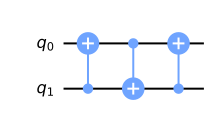

In [11]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

এটি $|00\rangle$, $|01\rangle$, $|10\rangle$ এবং $|11\rangle$ স্টেটগুলির জন্য কাজ করে এবং যদি এটি গণনাগত ভিত্তিতে সমস্ত স্টেটের জন্য কাজ করে তবে এটি অবশ্যই কাজ করবে সাধারণভাবে সব রাজ্য। এই সার্কিট তাই সব সম্ভাব্য দুই-কিউবিট অবস্থা অদলবদল করে।

যদি আমরা CNOT গেটগুলির ক্রম পরিবর্তন করি তবে একই প্রভাবটিও পরিণত হবে:

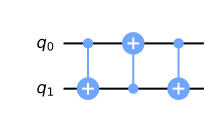

In [12]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()

এটি SWAP গেট পাওয়ার জন্য সমানভাবে বৈধ উপায়।

এখানে ব্যবহৃত ডেরিভেশনটি z বেসিস স্টেটের উপর ভিত্তি করে করা হয়েছে, কিন্তু $|+\rangle$ এবং $|-\rangle$ রাজ্যে qubits অদলবদল করার জন্য কী প্রয়োজন তা চিন্তা করেও এটি করা যেতে পারে। SWAP গেট বাস্তবায়নের ফলস্বরূপ উপায়গুলি এখানেরগুলির সম্পূর্ণ সমতুল্য হবে৷

#### Quick Exercise:

- একটি ভিন্ন সার্কিট খুঁজুন যা $|+\rangle$ এবং $|-\rangle$ রাজ্যে qubits অদলবদল করে এবং দেখান যে এটি উপরে দেখানো সার্কিটের সমতুল্য।

## 3. নিয়ন্ত্রিত ঘূর্ণন<a id="controlled-rotations"></a>

আমরা ইতিমধ্যে দেখেছি কিভাবে একটি একক CNOT গেট থেকে নিয়ন্ত্রিত $\pi$ ঘূর্ণন তৈরি করা যায়। এখন আমরা দেখব কিভাবে কোন নিয়ন্ত্রিত ঘূর্ণন তৈরি করা যায়।

প্রথমে, আসুন y অক্ষের চারপাশে নির্বিচারে ঘূর্ণন বিবেচনা করি। বিশেষভাবে, গেটগুলির নিম্নলিখিত ক্রমটি বিবেচনা করুন।

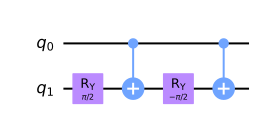

In [13]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()

যদি কন্ট্রোল কিউবিট $|0\rangle$ অবস্থায় থাকে, তাহলে আমাদের এখানে একটি $R_y(\theta/2)$ আছে যা অবিলম্বে তার বিপরীত, $R_y(-\theta/2)$ দ্বারা অনুসরণ করে। শেষ  তুচ্ছ. যদি কন্ট্রোল কিউবিট $|1\rangle$ অবস্থায় থাকে, তবে, `ry(-theta/2)` কার্যকরভাবে পূর্বে এবং একটি X গেট দ্বারা অনুসরণ করা হয়। এটি y ঘূর্ণনের দিকটি ফ্লিপ করার এবং একটি দ্বিতীয় $R_y(\theta/2)$ তৈরি করার প্রভাব ফেলে। এই ক্ষেত্রে নেট প্রভাবহল ঘূর্ণন $R_y(\theta)$ এর একটি নিয়ন্ত্রিত সংস্করণ তৈরি করা।

এই পদ্ধতিটি কাজ করে কারণ x এবং y অক্ষ অর্থোগোনাল, যার ফলে x গেটগুলি ঘূর্ণনের দিকটি ফ্লিপ করে। তাই এটি একইভাবে একটি নিয়ন্ত্রিত $R_z(\theta)$ তৈরি করতে কাজ করে। একটি নিয়ন্ত্রিত $R_x(\theta)$ একইভাবে CNOT গেট ব্যবহার করে তৈরি করা যেতে পারে।

আমরা যেকোনো একক-কিউবিট ঘূর্ণনের একটি নিয়ন্ত্রিত সংস্করণও তৈরি করতে পারি, $V$। এর জন্য আমাদের কেবল তিনটি ঘূর্ণন A, B এবং C এবং একটি ফেজ $\alpha$ খুঁজে বের করতে হবে

$$ ABC = I, ~~~e^{i\alpha}AZBZC = V $$

তারপরে আমরা নিয়ন্ত্রিত-জেড গেট ব্যবহার করি যখনই কন্ট্রোল $|0\rangle$ অবস্থায় থাকে তখন এই সম্পর্কগুলির প্রথমটি ঘটতে পারে এবং দ্বিতীয়টি ঘটতে পারে যখন নিয়ন্ত্রণটি $|1\rangle$ হয়। একটি $R_z(2\alpha)$ ঘূর্ণনও সঠিক ফেজ পেতে নিয়ন্ত্রণে ব্যবহার করা হয়, যেটি যখনই সুপারপজিশন স্টেট থাকবে তখনই গুরুত্বপূর্ণ হবে।

In [14]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit

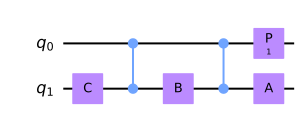

In [15]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
qc.draw()

![A controlled version of a gate V](images/iden1.png)

এখানে `A` , `B` এবং `C` হল গেট যা যথাক্রমে $A$, $B$ এবং $C$ প্রয়োগ করে।

## 4. টফোলি<a id="ccx"></a>

টফোলি গেটটি একটি তিন-কিউবিট গেট যার দুটি নিয়ন্ত্রণ এবং একটি লক্ষ্য। উভয় নিয়ন্ত্রণ $|1\rangle$ এ থাকলেই এটি লক্ষ্যে একটি X সম্পাদন করে। লক্ষ্যের চূড়ান্ত অবস্থা তখন দুটি নিয়ন্ত্রণের AND বা NAND-এর সমান, লক্ষ্যের প্রাথমিক অবস্থা $|0\rangle$ বা $|1\rangle$ ছিল কিনা তার উপর নির্ভর করে। একটি টফোলিকে একটি নিয়ন্ত্রিত-নিয়ন্ত্রিত-না হিসাবেও ভাবা যেতে পারে এবং একে CCX গেটও বলা হয়।

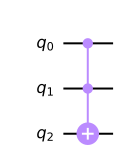

In [16]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

একক- এবং দুই-কুবিট গেট থেকে কীভাবে এটি তৈরি করা যায় তা দেখার জন্য, প্রথমে আরও সাধারণ কিছু কীভাবে তৈরি করা যায় তা দেখানো সহায়ক: যেকোনো একক-কিউবিট ঘূর্ণন U-এর জন্য একটি নির্বিচারে নিয়ন্ত্রিত-নিয়ন্ত্রিত-U। এর জন্য আমাদের সংজ্ঞায়িত করতে হবে। $V = \sqrt{U}$ এবং $V^\dagger$ এর নিয়ন্ত্রিত সংস্করণ। নীচের কোডে, আমরা যথাক্রমে অনির্ধারিত সাবরুটিন `cv` এবং `cvdg` এর জায়গায় `cp(theta,c,t)` এবং `cp(-theta,c,t)` ব্যবহার করি। নিয়ন্ত্রণগুলি হল qubits $a$ এবং $b$, এবং লক্ষ্য হল qubit $t$.

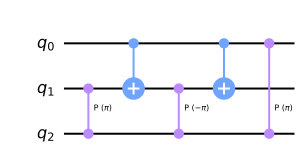

In [17]:
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw()

![A doubly controlled version of a gate V](images/iden2.png)

দুটি কন্ট্রোল কিউবিটের প্রতিটি মানের মাধ্যমে ট্রেস করে, আপনি নিজেকে বোঝাতে পারেন যে লক্ষ্য কিউবিটে একটি U গেট প্রয়োগ করা হয় যদি এবং শুধুমাত্র উভয় নিয়ন্ত্রণ 1 হয়। আমরা ইতিমধ্যে বর্ণিত ধারণাগুলি ব্যবহার করে, আপনি এখন প্রতিটি নিয়ন্ত্রিত-V গেট বাস্তবায়ন করতে পারেন। দ্বিগুণ-নিয়ন্ত্রিত-ইউ গেটের জন্য কিছু সার্কিটে পৌঁছাতে। দেখা যাচ্ছে যে টফোলি গেট বাস্তবায়নের জন্য ন্যূনতম সংখ্যক সিএনওটি গেট প্রয়োজন [২]।

![A Toffoli](images/iden3.png)

এটি যথাক্রমে 3 কিউবিট (q0,q1,q2) সহ একটি টফোলি। এই সার্কিটের উদাহরণে, q0 q2 এর সাথে সংযুক্ত কিন্তু q0 q1 এর সাথে সংযুক্ত নয়।

টফোলি কোয়ান্টাম কম্পিউটিংয়ে একটি AND গেট বাস্তবায়নের অনন্য উপায় নয়। আমরা অন্যান্য গেটগুলিকেও সংজ্ঞায়িত করতে পারি যেগুলির একই প্রভাব রয়েছে, তবে যা আপেক্ষিক পর্যায়গুলিও প্রবর্তন করে। এই ক্ষেত্রে, আমরা কম CNOTs সঙ্গে গেট বাস্তবায়ন করতে পারেন.

উদাহরণ স্বরূপ, ধরুন আমরা নিয়ন্ত্রিত-হাদামার্ড এবং নিয়ন্ত্রিত-$Z$ গেট উভয়ই ব্যবহার করি, যেটি উভয়ই একক CNOT দিয়ে প্রয়োগ করা যেতে পারে। এগুলি দিয়ে আমরা নিম্নলিখিত সার্কিট তৈরি করতে পারি:

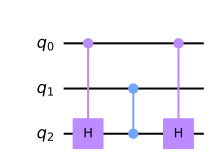

In [18]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw()

রাষ্ট্রের জন্য $|00\rangle$ দুটি নিয়ন্ত্রণে, এটি লক্ষ্যে কিছুই করে না। $|11\rangle$ এর জন্য, লক্ষ্যটি একটি $Z$ গেট অনুভব করে যার পূর্বে এবং একটি H দ্বারা অনুসরণ করা হয়। নিট প্রভাব হল লক্ষ্যের উপর একটি $X$। $|01\rangle$ এবং $|10\rangle$ রাজ্যগুলির জন্য, লক্ষ্যমাত্রা হয় শুধুমাত্র দুটি হাদামার্ড (যা একে অপরকে বাতিল করে) অথবা শুধুমাত্র $Z$ (যা শুধুমাত্র একটি আপেক্ষিক পর্যায় প্ররোচিত করে) অনুভব করে। তাই এটি একটি AND-এর প্রভাবকেও পুনরুত্পাদন করে, কারণ লক্ষ্যের মান শুধুমাত্র $|11\rangle$ কন্ট্রোলের জন্য পরিবর্তিত হয় -- কিন্তু এটি মাত্র তিনটি CNOT গেটের সমতুল্য করে।

## 5. H এবং T থেকে নির্বিচারে ঘূর্ণন<a id="arbitrary-rotations"></a>

বর্তমান ডিভাইসের qubits গোলমাল সাপেক্ষে, যা মূলত গেটগুলি নিয়ে গঠিত যা ভুল করে করা হয়। তাপমাত্রা, বিপথগামী চৌম্বক ক্ষেত্র বা প্রতিবেশী কিউবিটগুলিতে কার্যকলাপের মতো সাধারণ জিনিসগুলি এমন কিছু ঘটতে পারে যা আমরা চাইনি।

কোয়ান্টাম কম্পিউটারের বড় অ্যাপ্লিকেশনের জন্য, আমাদের কিউবিটগুলিকে এমনভাবে এনকোড করতে হবে যা তাদের এই গোলমাল থেকে রক্ষা করে। এটি ভুল দ্বারা করা অনেক কঠিন গেট তৈরি করে, বা সামান্য ভুল যে পদ্ধতিতে বাস্তবায়ন করা হয়.

এটি একক-কিউবিট ঘূর্ণন $R_x(\theta)$, $R_y(\theta)$ এবং $R_z(\theta)$ এর জন্য দুর্ভাগ্যজনক। নিখুঁত নির্ভুলতার সাথে একটি কোণ $\theta$ বাস্তবায়ন করা অসম্ভব, যেমন আপনি নিশ্চিত যে আপনি ভুলবশত $\theta + 0.0000001$ এর মতো কিছু বাস্তবায়ন করছেন না। আমরা যে নির্ভুলতা অর্জন করতে পারি তার সর্বদা একটি সীমা থাকবে, এবং যখন আমরা বড় সার্কিটগুলিতে অসম্পূর্ণতার বিল্ড আপের জন্য হিসাব করি তখন এটি সর্বদা সহনীয়তার চেয়ে বড় হবে। তাই আমরা এই ঘূর্ণনগুলিকে সরাসরি ত্রুটি-সহনশীল কোয়ান্টাম কম্পিউটারগুলিতে প্রয়োগ করতে সক্ষম হব না, তবে এর পরিবর্তে তাদের আরও ইচ্ছাকৃতভাবে তৈরি করতে হবে।

দোষ-সহনশীল স্কিমগুলি সাধারণত মাত্র দুটি গেটের একাধিক অ্যাপ্লিকেশন ব্যবহার করে এই ঘূর্ণনগুলি সম্পাদন করে: $H$ এবং $T$।

T-গেটটি কিস্কিট-এ `.t()` হিসাবে প্রকাশ করা হয়েছে:

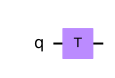

In [19]:
qc = QuantumCircuit(1)
qc.t(0) # T gate on qubit 0
qc.draw()

এটি $\theta = \pi/4$ দ্বারা z অক্ষের চারপাশে একটি ঘূর্ণন, এবং তাই গাণিতিকভাবে $R_z(\pi/4) = e^{i\pi/8~Z}$ হিসাবে প্রকাশ করা হয়।

নিম্নলিখিতটিতে আমরা অনুমান করি যে $H$ এবং $T$ গেটগুলি কার্যকরভাবে নিখুঁত। এটি ত্রুটি সংশোধন এবং দোষ-সহনশীলতার জন্য উপযুক্ত পদ্ধতি দ্বারা প্রকৌশলী করা যেতে পারে।

হাদামার্ড এবং শেষ অধ্যায়ে আলোচিত পদ্ধতিগুলি ব্যবহার করে, আমরা x অক্ষের চারপাশে অনুরূপ ঘূর্ণন তৈরি করতে T গেট ব্যবহার করতে পারি।

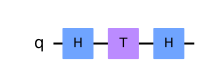

In [20]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

এখন দুইটা একসাথে করা যাক। আসুন গেটটি তৈরি করি $R_z(\pi/4)~R_x(\pi/4)$।

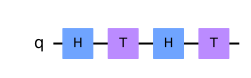

In [21]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()

যেহেতু এটি একটি একক-কিউবিট গেট, তাই আমরা এটিকে ব্লোচ গোলকের চারপাশে ঘূর্ণন হিসাবে ভাবতে পারি। এর মানে হল যে এটি কিছু কোণ দ্বারা কিছু অক্ষের চারপাশে একটি ঘূর্ণন। আমাদের এখানে অক্ষ সম্পর্কে খুব বেশি চিন্তা করার দরকার নেই, তবে এটি স্পষ্টতই x, y বা z হবে না। আরও গুরুত্বপূর্ণ হল কোণ।

এই ঘূর্ণনের জন্য কোণের গুরুত্বপূর্ণ বৈশিষ্ট্য হল এটি $\pi$ এর একটি অমূলদ গুণিতক। আপনি নিজেই একগুচ্ছ গণিত দিয়ে এটি প্রমাণ করতে পারেন, তবে আপনি গেট প্রয়োগ করে কর্মে অযৌক্তিকতাও দেখতে পারেন। মনে রাখবেন যে প্রতিবার আমরা $2\pi$ এর চেয়ে বড় একটি ঘূর্ণন প্রয়োগ করি, আমরা ঘূর্ণন কোণে $2\pi$ দ্বারা একটি অন্তর্নিহিত মডিউল করছি। এইভাবে, উপরে উল্লিখিত সম্মিলিত ঘূর্ণন $n$ বার পুনরাবৃত্তি করলে একই অক্ষের চারপাশে একটি ভিন্ন কোণে ঘূর্ণন হয়। একটি কঠোর প্রমাণ একটি ইঙ্গিত হিসাবে, একটি অযৌক্তিক সংখ্যা কি হিসাবে লেখা যাবে না যে মনে রাখবেন?

আমরা আমাদের সুবিধার জন্য এটি ব্যবহার করতে পারেন. প্রতিটি কোণ হবে $0$ এবং $2\pi$ এর মধ্যে। আসুন এই ব্যবধানটিকে $2\pi/n$ প্রস্থের $n$ স্লাইসে বিভক্ত করি। প্রতিটি পুনরাবৃত্তির জন্য, ফলস্বরূপ কোণটি এই স্লাইসের মধ্যে একটিতে পড়বে। যদি আমরা প্রথম $n+1$ পুনরাবৃত্তির জন্য কোণগুলি দেখি, তবে এটি অবশ্যই সত্য যে পায়রা হোল নীতির কারণে কমপক্ষে একটি স্লাইসে এই দুটি কোণ রয়েছে। আসুন প্রথমটির জন্য প্রয়োজনীয় পুনরাবৃত্তির সংখ্যা বোঝাতে $n_1$ এবং দ্বিতীয়টির জন্য $n_2$ ব্যবহার করি।

এর মাধ্যমে, আমরা $n_2-n_1$ পুনরাবৃত্তির জন্য কোণ সম্পর্কে কিছু প্রমাণ করতে পারি। এটি কার্যকরভাবে $n_2$ পুনরাবৃত্তি করার সমান, তারপরে $n_1$ পুনরাবৃত্তির বিপরীত। যেহেতু এইগুলির কোণগুলি সমান নয় (অযৌক্তিকতার কারণে) তবে $2\pi/n$ এর চেয়ে বেশি নয় (কারণ তারা একই স্লাইসের সাথে মিলে যায়), $n_2-n_1$ পুনরাবৃত্তির কোণটি সন্তুষ্ট হয়

$$ \theta_{n_2-n_1} \neq 0, ~~~~-\frac{2\pi}{n} \leq \theta_{n_2-n_1} \leq \frac{2\pi}{n} . $$

তাই ছোট কোণে ঘূর্ণন করার ক্ষমতা আমাদের আছে। আমরা এই গেটটির পুনরাবৃত্তির সংখ্যা বাড়িয়ে যতবার আমাদের পছন্দ মতো ছোট কোণগুলির চারপাশে ঘুরতে এটি ব্যবহার করতে পারি।

অনেক ছোট-কোণ ঘূর্ণন ব্যবহার করে, আমরা আমাদের পছন্দ মতো যেকোন কোণে ঘোরাতে পারি। এটি সর্বদা সঠিক হবে না, তবে এটি $2\pi/n$ পর্যন্ত নির্ভুল হওয়ার গ্যারান্টি রয়েছে, যা আমাদের পছন্দ মতো ছোট করা যেতে পারে। আমাদের ঘূর্ণনগুলির ভুলগুলির উপর এখন আমাদের ক্ষমতা রয়েছে।

এখন পর্যন্ত, আমাদের শুধুমাত্র একটি অক্ষের চারপাশে এই নির্বিচারে ঘূর্ণন করার ক্ষমতা আছে। দ্বিতীয় অক্ষের জন্য, আমরা কেবল বিপরীত ক্রমে $R_z(\pi/4)$ এবং $R_x(\pi/4)$ ঘূর্ণন করি।

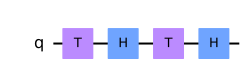

In [22]:
qc = QuantumCircuit(1)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

এই ঘূর্ণনের সাথে সামঞ্জস্যপূর্ণ অক্ষটি পূর্বে বিবেচনা করা গেটের মতো নয়। তাই আমাদের কাছে এখন দুটি অক্ষের চারপাশে নির্বিচারে ঘূর্ণন রয়েছে, যা ব্লোচ গোলকের চারপাশে যে কোনও নির্বিচারে ঘূর্ণন তৈরি করতে ব্যবহার করা যেতে পারে। আমরা সবকিছু করতে সক্ষম হয়ে ফিরে এসেছি, যদিও এটির জন্য অনেক $T$ গেট খরচ হয়।

এই ধরনের প্রয়োগের কারণেই $T$ গেটগুলি কোয়ান্টাম কম্পিউটেশনে এত বিশিষ্ট। প্রকৃতপক্ষে, ফল্ট-সহনশীল কোয়ান্টাম কম্পিউটারগুলির জন্য অ্যালগরিদমের জটিলতা প্রায়শই তাদের কত $T$ গেটের প্রয়োজন হবে তার পরিপ্রেক্ষিতে উদ্ধৃত করা হয়। এটি যতটা সম্ভব কম $T$ গেট দিয়ে জিনিসগুলি অর্জন করতে অনুপ্রাণিত করে। মনে রাখবেন যে উপরের আলোচনাটি কেবল প্রমাণ করার উদ্দেশ্যে করা হয়েছিল যে $T$ গেটগুলি এইভাবে ব্যবহার করা যেতে পারে এবং এটি আমাদের জানা সবচেয়ে কার্যকর পদ্ধতির প্রতিনিধিত্ব করে না।

## 6. তথ্যসূত্র<a id="references"></a>

[1] [Barenco, *et al.* 1995](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457?cm_mc_uid=43781767191014577577895&cm_mc_sid_50200000=1460741020)

[2] [Shende and Markov, 2009](http://dl.acm.org/citation.cfm?id=2011799)

In [23]:
import qiskit.tools.jupyter
%qiskit_version_table

/home/divs/anaconda3/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.1
qiskit-aer,0.8.2
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.4
qiskit,0.29.0
qiskit-nature,0.1.5
qiskit-finance,0.2.0
qiskit-optimization,0.2.1
qiskit-machine-learning,0.2.0
